
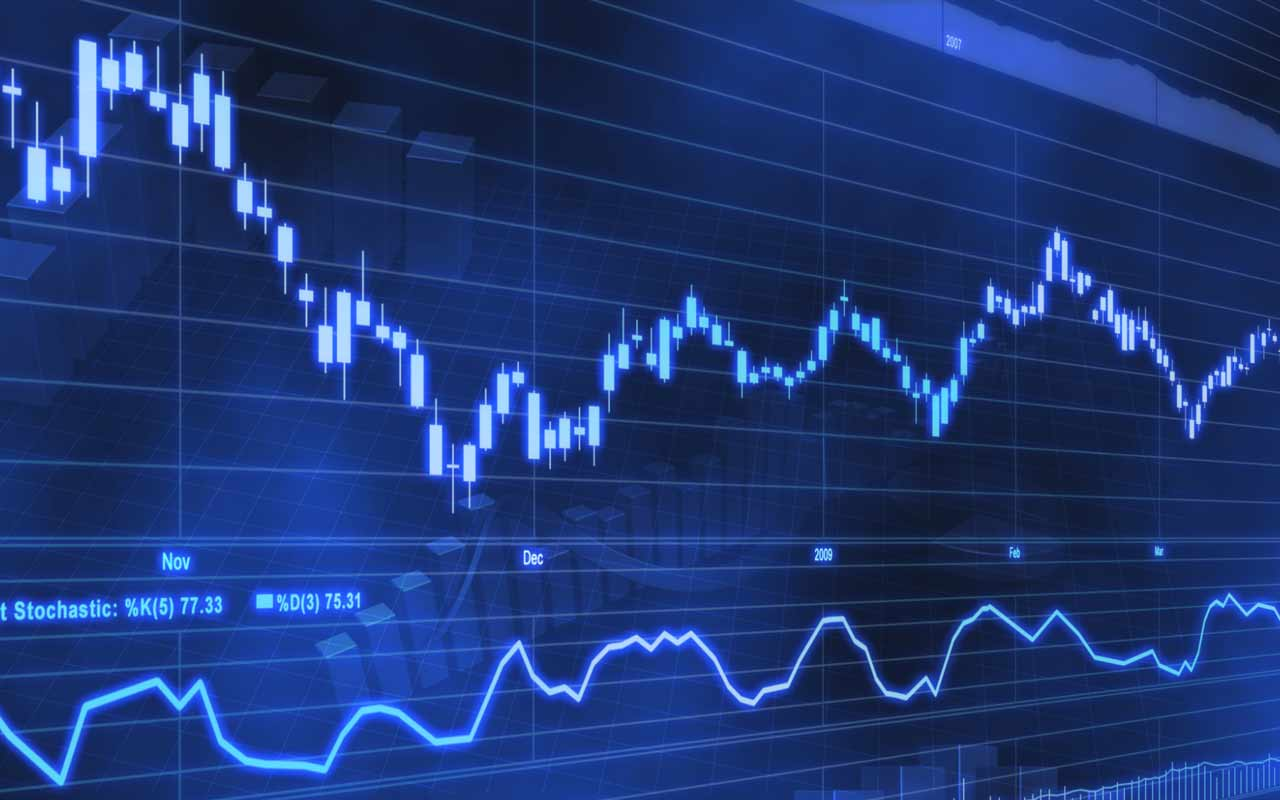
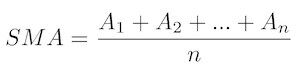
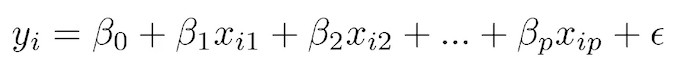
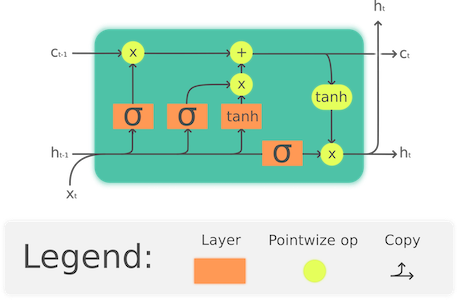

In [1]:
# Load External Style Sheet
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('style.css').read()))

# <div class="title_outer_div"><span class="title_inner_div"><h1>Predictive Modeling of Cryptoasset Price Movement: Multiple Regression Modeling</h1></span></div>

**03/29/2019**  
Andrew Thorson

## Table of Contents
1. [**Overview**](#Overview)  
2. [**Methodology**](#Methodology)
    1. [Analytic Approach](#Analytic-Approach)
    2. [Data Requirements](#Data-Requirements)
    3. [Data Collection](#Data-Collection)
    4. [Data Preparation](#Data-Preparation)
    5. [Modeling](#Modeling)
3. [**Results**](#Results)
4. [**Conclusion**](#Conclusion)
5. [**References**](#References)

## Overview
The goal of this project is the production of a model that is capable of accurately predicting a cryptoassets market price movement. This prediction will be generated using a particular time-series market data set and a particular time-series blockchain data set. Feature selection will be constrained to only the attributes provided in the data sets, and to features which can be generated from them. In turn, models and their algorithms will be impacted by the same constraints.

## Methodology

### Analytic Approach

The analytic approach best suited for generating a model capable of predicting cryptoasset market price movement is the predictive analytic approach. The accuracy of the model is likely to be limited by the overwhelmingly high number variables that impact the growth of a cryptoasset and its relative value. Wharton Research Scholars published "An Analysis of the Crytocurrency Industry" in 2015. Author Ryan Farell indicates that at least two of the main factors are largely unquantifiable in terms of impact:
1. International government regulatory attempts. <sup>[1](#r1)</sup>
2. Ambivalent public perception in moving towards it's wider adoption. <sup>[1](#r1)</sup>
    


Given the demonstrably apparent unpredictability of cryptocurrency exchange rates at any particular time, there will be some measurable error in the models predictions but this error should be minimized. In order to produce a model approaching optimal accuracy, multiple models will be produced using machine learning techniques and subsequently evaluated for accuracy. This process is done in separate notebooks, where each notebook is dedicated to one technique or model. This notebook examines the usefulness of multiple linear regression and machine learning at predicting cryptoasset price movements.

### Data Requirements

#### Data Provided by Digital Assets Data
Mr. Steve A. Collins, Vice President of Data Science for Digital Assets Data, provided a ZIP file titled "Tech_Eval.zip". Three files were contained in the ZIP file: two csv data files and one docx Microsoft Word file.
- **Market Data**: market_data.csv
- **Blockchain Data**: blockchain_data.csv
- **Data Dictionary**: data_dictionary.docx

This work was done as a technical exercise, which has been part of the interview process for a position as a Data Scientist with Digital Assets Data.

Learn more about Digital Assets Data by visiting their website: https://www.digitalassetsdata.com/

### Data Collection

#### 1. Import Packages/Libraries

In [2]:
# import packages for data collection
import pandas as pd # library providing data structures and data analysis tools - https://pandas.pydata.org/
import numpy as np

#### 2. Load Data

##### 2.1 Load Market Data
Generate and load a DataFrame with market data from market_data.csv

In [3]:
market_data = pd.read_csv('Tech_Eval/market_data.csv') # construct dataframe from csv file
market_data.name = "Market Data" # name dataframe
print("{}\nRows: {}\nColumns: {}".format(market_data.name, market_data.shape[0], market_data.shape[1])) # verify shape of dataframe
market_data.sample(5) # sample contents of dataframe

Market Data
Rows: 4563
Columns: 17


,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std
3857,TRON_TRX_TRX,USDollar_USD_USD,2018-03-06 00:00:00+00,0.043605,0.0480,0.042431,0.043548,0.043876,0.000476,0.043839,0.043834,90234,2.030947e+09,1.291454e+06,6.810000e-06,22751.041684,55404.751319
2599,Litecoin_LTC_LTC,USDollar_USD_USD,2018-06-28 00:00:00+00,78.892243,81.3660,55.422207,73.565255,76.896557,1.373616,76.716172,76.684575,158084,7.381703e+05,1.904508e+03,1.000000e-08,4.937206,17.768064
1510,EOS_EOS_EOS,USDollar_USD_USD,2018-10-05 00:00:00+00,5.752380,5.9289,3.319314,5.763813,5.707455,0.045742,5.705511,5.705187,111017,2.135486e+07,2.757840e+04,1.000000e-08,219.610840,388.044124
3044,Zcash_ZEC_ZEC,USDollar_USD_USD,2018-05-19 00:00:00+00,356.288795,381.7500,335.712026,341.118247,358.586873,10.115389,359.771019,359.493614,87093,1.085812e+05,3.388500e+02,1.000000e-08,2.200634,5.942260
1740,Ethereum_ETH_ETH,USDollar_USD_USD,2018-09-14 00:00:00+00,207.508807,224.7900,118.228371,206.088158,209.670730,5.006610,209.547917,209.420665,664133,2.459130e+06,2.904594e+03,1.000000e-08,4.402301,16.842941


#### 2.2 Load Blockchain Data
Generate and load a DataFrame with blockchain data from blockchain_data.csv

In [4]:
blockchain_data = pd.read_csv('Tech_Eval/blockchain_data.csv') # construct dataframe from csv file
blockchain_data.name = "Blockchain Data" # name dataframe
print("{}\nRows: {}\nColumns: {}".format(blockchain_data.name, blockchain_data.shape[0], blockchain_data.shape[1])) # verify shape of dataframe
blockchain_data.sample(5) # verify contents of dataframe

Blockchain Data
Rows: 2075
Columns: 23


,asset_id,epoch_ts,volume_sum,volume_high,volume_low,volume_mean_q,volume_mean_a,volume_mean_g,volume_mean_h,volume_std,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
1319,Zcash_ZEC_ZEC,2018-06-01 00:00:00+00,2.470437e+06,18080.054167,0.000000,1922.793802,246.944931,1.013240,3.600131e-03,1906.965577,...,0.023319,0.0,0.001927,0.001153,0.000295,0.000018,0.001543,7062.500000,4.046250e+06,14158537388
1052,Ethereum_ETH_ETH,2018-07-24 00:00:00+00,1.750987e+06,27000.000000,0.000000,78.493986,2.210731,0.057186,7.854117e-15,78.462897,...,0.159844,0.0,0.008396,0.002725,0.001403,0.000995,0.007942,20937.968750,2.922350e+07,49423230859
1626,Dash_DASH_DASH,2018-03-31 00:00:00+00,1.117058e+05,10220.547576,0.000034,153.681734,14.744688,0.236023,1.005214e-02,152.982871,...,0.200000,0.0,0.009964,0.001265,0.000015,0.000005,0.009884,1856.806995,7.714633e+06,4733496154
515,Bitcoin_BTC_BTC,2018-11-08 00:00:00+00,7.897664e+05,3612.695562,0.000000,31.128856,2.845010,0.056431,1.553174e-03,30.998630,...,0.040614,0.0,0.000347,0.000076,0.000032,0.000020,0.000339,1512.500000,1.736642e+07,182774578000
403,Litecoin_LTC_LTC,2018-12-01 00:00:00+00,2.112885e+06,109311.469929,0.000010,1106.819072,90.503065,2.401177,3.457357e-03,1103.136338,...,0.100000,0.0,0.003407,0.000659,0.000140,0.000026,0.003343,14825.000000,5.940488e+07,17076135638


### Data Understanding

#### 1. Market Data: Exchange Market Trading Data Aggregated Daily by Cryptoasset
Filename: market_data.csv

This data was received as a CSV file covering market data derived from exchange trades aggregated at the daily level by Cryptoasset for the period beginning January 1st, 2019 and ending February 19th, 2019.

##### 1.1 Set of Assets Included

- Bitcoin_BTC_BTC  
- Ethereum_ETH_ETH  
- Litecoin_LTC_LTC  
- Dash_DASH_DASH  
- Zcash_ZEC_ZEC  
- Cardano_ADA_ADA  
- EOS_EOS_EOS  
- NEO_NEO_NEO  
- Ripple_XRP_XRP  
- Stellar_XLM_XLM  
- TRON_TRX_TRX

##### 1.2 Data Dictionary

<div class="data_dictionary">
    <table>
      <tr>
        <th>Index</th>
        <th>Field</th>
        <th>Description</th>
      </tr>
      <tr>
        <td>1</td>
        <td>base_asset_id</td>
        <td>id for the given asset</td>
      </tr>
      <tr>
        <td>2</td>
        <td>quote_asset_id</td>
        <td>id for the asset that the base is quoted in (should all be US Dollars)</td>
      </tr>
      <tr>
        <td>3</td>
        <td>epoch_ts</td>
        <td>timestamp for the row (daily)</td>
      </tr>
      <tr>
        <td>4</td>
        <td>price_open</td>
        <td>opening price (USD)</td>
      </tr>
      <tr>
        <td>5</td>
        <td>price_high</td>
        <td>highest price (USD)</td>
      </tr>
      <tr>
        <td>6</td>
        <td>price_low</td>
        <td>lowest price (USD)</td>
      </tr>
      <tr>
        <td>7</td>
        <td>price_close</td>
        <td>closing price (USD)</td>
      </tr>
      <tr>
        <td>8</td>
        <td>price_mean_a</td>
        <td>arithmetic mean of price (USD)</td>
      </tr>
      <tr>
        <td>9</td>
        <td>price_std</td>
        <td>standard deviation of price (USD)</td>
      </tr>
      <tr>
        <td>10</td>
        <td>price_vwap_a</td>
        <td>arithmetic volume weighted average price</td>
      </tr>
      <tr>
        <td>11</td>
        <td>price_vwap_h</td>
        <td>harmonic volume weighted average price</td>
      </tr>
      <tr>
        <td>12</td>
        <td>cnt_total</td>
        <td>transaction count</td>
      </tr>
      <tr>
        <td>13</td>
        <td>volume_total</td>
        <td>total market transacted volume</td>
      </tr>
      <tr>
        <td>14</td>
        <td>volume_high</td>
        <td>volume of highest volume market transaction</td>
      </tr>
      <tr>
        <td>15</td>
        <td>volume_low</td>
        <td>volume of lowest volume market transaction</td>
      </tr>
      <tr>
        <td>16</td>
        <td>volume_mean_a</td>
        <td>arithmetic mean of market volume</td>
      </tr>
      <tr>
        <td>17</td>
        <td>volume_std</td>
        <td>standard deviation of market volume</td>
      </tr>
    </table>
</div>

#### 2. Blockchain Data: Blockchain Data Aggregated Daily by Cryptoasset
Filename: blockchain_data.csv

This data was received as a CSV file consisting of blockchain data for a subset of the assets in the market data file also aggregated at the daily level for the period beginning January 1st, 2018 and ending February 19th, 2019.

##### 2.1 Set of Assets Included

- Bitcoin_BTC_BTC  
- Ethereum_ETH_ETH  
- Litecoin_LTC_LTC  
- Dash_DASH_DASH  
- Zcash_ZEC_ZEC

##### 2.2 Data Dictionary

<div class="data_dictionary">
    <table>
      <tr>
        <th>Index</th>
        <th>Field</th>
        <th>Description</th>
      </tr>
      <tr>
        <td>1</td>
        <td>asset_id</td>
        <td>id for the given asset</td>
      </tr>
      <tr>
        <td>2</td>
        <td>epoch_ts</td>
        <td>timestamp for the row (daily)</td>
      </tr>
      <tr>
        <td>3</td>
        <td>volume_sum</td>
        <td>total transacted blockchain volume</td>
      </tr>
      <tr>
        <td>4</td>
        <td>volume_high</td>
        <td>volume of highest volume blockchain transaction</td>
      </tr>
      <tr>
        <td>5</td>
        <td>volume_low</td>
        <td>volume of lowest volume blockchain transaction</td>
      </tr>
      <tr>
        <td>6</td>
        <td>volume_mean_q</td>
        <td>quadratic mean of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>7</td>
        <td>volume_mean_a</td>
        <td>arithmetic mean of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>8</td>
        <td>volume_mean_g</td>
        <td>geometric mean of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>9</td>
        <td>volume_mean_h</td>
        <td>harmonic mean of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>10</td>
        <td>volume_std</td>
        <td>standard deviation of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>11</td>
        <td>coinbase_volume</td>
        <td>total volume of the days coinbase transactions</td>
      </tr>
      <tr>
        <td>12</td>
        <td>txn_count</td>
        <td>blockchain transaction count</td>
      </tr>
      <tr>
        <td>13</td>
        <td>fee_sum</td>
        <td>total blockchain fee volume</td>
      </tr>
      <tr>
        <td>14</td>
        <td>fee_high</td>
        <td>volume of highest volume blockchain fee</td>
      </tr>
      <tr>
        <td>15</td>
        <td>fee_low</td>
        <td>volume of lowest volume blockchain fee</td>
      </tr>
      <tr>
        <td>16</td>
        <td>fee_mean_q</td>
        <td>quadratic mean of blockchain fee volume</td>
      </tr>
      <tr>
        <td>17</td>
        <td>fee_mean_a</td>
        <td>arithmetic mean of blockchain fee volume</td>
      </tr>
      <tr>
        <td>18</td>
        <td>fee_mean_g</td>
        <td>geometric mean of blockchain fee volume</td>
      </tr>
      <tr>
        <td>19</td>
        <td>fee_mean_h</td>
        <td>harmonic mean of blockchain fee volume</td>
      </tr>
      <tr>
        <td>20</td>
        <td>fee_std</td>
        <td>standard deviation of blockchain fee volume</td>
      </tr>
      <tr>
        <td>21</td>
        <td>block_reward_sum</td>
        <td>total block of issued block rewards</td>
      </tr>
      <tr>
        <td>22</td>
        <td>supply_total</td>
        <td>number of issued assets</td>
      </tr>
      <tr>
        <td>23</td>
        <td>blockchain_size</td>
        <td>size of the total blockchain (bytes)</td>
      </tr>
    </table>
</div>

### Data Preparation

#### 1. Import Packages/Libraries

In [5]:
# import packages for preprocessing
from sklearn import preprocessing # scikit-learn is a Python module for machine learning - https://scikit-learn.org/stable/

#### 2. Clean Market Data

##### 2.1 Ensure Proper Data Types

Ensure that each column has the proper data type.

In [6]:
# return pandas data types for each column
market_data.dtypes

base_asset_id      object
quote_asset_id     object
epoch_ts           object
price_open        float64
price_high        float64
price_low         float64
price_close       float64
price_mean_a      float64
price_std         float64
price_vwap_a      float64
price_vwap_h      float64
cnt_total           int64
volume_total      float64
volume_high       float64
volume_low        float64
volume_mean_a     float64
volume_std        float64
dtype: object

**market_data.epoch_ts**

market_data.epoch_ts is currently of the object data type. It should be of the datetime64 data type. Other columns appear to be of the proper data type.

In [7]:
market_data.epoch_ts = market_data.epoch_ts.astype('datetime64') # set data type of epoch_ts to datetime64
market_data.dtypes # verify data types

base_asset_id             object
quote_asset_id            object
epoch_ts          datetime64[ns]
price_open               float64
price_high               float64
price_low                float64
price_close              float64
price_mean_a             float64
price_std                float64
price_vwap_a             float64
price_vwap_h             float64
cnt_total                  int64
volume_total             float64
volume_high              float64
volume_low               float64
volume_mean_a            float64
volume_std               float64
dtype: object

##### 2.2 Reduce Redundancy

**market_data.base_asset_id**

The values for base_asset_id appear to be a bit redundant as they are in the following form: name_symbol_symbol
The same form is followed for asset_id in blockchain_data, so the current forms will easily match if these values are left alone and tables are merged later but a more concise value for market_data.base_asset_id & blockchain_data.asset_id might help for label readibility when it comes time for visualization. It may also reduce the processing load slightly. Before making any changes, we will ensure that all values for market_data.base_asset_id follow the form: name_symbol_symbol.

In [8]:
# return unique values
print("Unique market_data.base_asset_id Values:")
print("\n".join(market_data.base_asset_id.unique()))

Unique market_data.base_asset_id Values:
Bitcoin_BTC_BTC
Cardano_ADA_ADA
Dash_DASH_DASH
EOS_EOS_EOS
Ethereum_ETH_ETH
Litecoin_LTC_LTC
NEO_NEO_NEO
Ripple_XRP_XRP
Stellar_XLM_XLM
TRON_TRX_TRX
Zcash_ZEC_ZEC


**market_data.quote_asset_id**

As with market_data.base_asset_id, the values for market_data.quote_asset_id appear to be redundant. There is no matching column in blockchain_data so, reducing redundancy should not result in problems later on. Before making any changes, we will ensure that all values for market_data.quote_asset_id follow the form: name_symbol_symbol.

In [9]:
# return unique values
print("Unique market_data.quote_asset_id Values:")
print("\n".join(market_data.quote_asset_id.unique()))

Unique market_data.quote_asset_id Values:
USDollar_USD_USD


In [10]:
# reduce redundancy
market_data.base_asset_id = market_data.base_asset_id.str.extract(r'(.*)\_') # remove redundant repetition of base asset symbol
market_data.quote_asset_id = market_data.quote_asset_id.str.extract(r'(.*)\_') # remove redundant repetition of quote asset symbol

In [11]:
market_data.sample(10) # return sample of cleaned dataframe

,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std
1443,Dash_DASH,USDollar_USD,2018-10-11,170.173689,179.770000,153.857333,155.012736,163.081966,4.038455,163.163540,163.058609,25228,3.168803e+04,3.000000e+02,2.000000e-08,1.494057,4.857960
590,Ripple_XRP,USDollar_USD,2018-12-28,0.348205,0.395900,0.342880,0.385412,0.370122,0.014558,0.372738,0.372184,34667,5.501586e+07,1.694850e+05,1.200000e-07,1614.619681,4194.442932
2852,Litecoin_LTC,USDollar_USD,2018-06-05,117.792246,123.030000,85.675120,119.019188,117.009817,1.362599,117.054471,117.034666,117453,4.718910e+05,9.608702e+02,1.000000e-08,4.809333,14.443632
4202,Dash_DASH,USDollar_USD,2018-02-02,595.429179,623.400000,452.060000,577.869361,544.608440,28.197093,540.433263,538.294116,45044,6.081185e+04,4.741421e+02,1.370000e-06,1.819926,6.954243
3446,Litecoin_LTC,USDollar_USD,2018-04-12,118.077292,131.134290,74.594156,125.844743,119.403999,3.870293,119.546449,119.421658,327667,1.746111e+06,2.083175e+03,1.000000e-08,8.030360,23.467450
4311,Cardano_ADA,USDollar_USD,2018-01-23,0.544850,0.559406,0.528710,0.544243,0.543049,0.004418,0.542826,0.542785,68756,5.230346e+07,2.365740e+05,1.000000e+00,776.284107,2699.155602
2269,Litecoin_LTC,USDollar_USD,2018-07-28,83.382465,87.038514,61.080617,82.829827,82.674547,0.379076,82.664270,82.662114,81255,3.870551e+05,7.305120e+02,1.000000e-08,5.120867,10.368145
559,TRON_TRX,USDollar_USD,2018-12-31,0.020046,0.020527,0.011856,0.019257,0.019605,0.000272,0.019585,0.019581,68591,5.971715e+08,1.623603e+06,5.000000e-06,10543.776423,27513.946799
65,Zcash_ZEC,USDollar_USD,2019-02-14,52.828640,54.368000,37.856501,51.647067,52.358469,0.459731,52.258389,52.254968,14780,4.264817e+04,1.009386e+03,2.000000e-08,3.036016,10.680270
2172,Ripple_XRP,USDollar_USD,2018-08-06,0.427482,0.437070,0.398184,0.408579,0.417243,0.006593,0.417379,0.417274,109749,1.359875e+08,2.200000e+05,1.000000e-08,1427.371138,3871.888879


#### 3. Clean Blockchain Data

##### 3.1 Ensure Proper Data Types

Ensure that each column has the proper data type.

In [12]:
# return pandas data types for each column
blockchain_data.dtypes

asset_id             object
epoch_ts             object
volume_sum          float64
volume_high         float64
volume_low          float64
volume_mean_q       float64
volume_mean_a       float64
volume_mean_g       float64
volume_mean_h       float64
volume_std          float64
coinbase_volume     float64
txn_count             int64
fee_sum             float64
fee_high            float64
fee_low             float64
fee_mean_q          float64
fee_mean_a          float64
fee_mean_g          float64
fee_mean_h          float64
fee_std             float64
block_reward_sum    float64
supply_total        float64
blockchain_size       int64
dtype: object

**blockchain_data.epoch_ts**

blockchain_data.epoch_ts is currently of the object data type. It should be of the datetime64 data type. Other columns appear to be of the proper data type.

In [13]:
blockchain_data.epoch_ts = blockchain_data.epoch_ts.astype('datetime64') # set data type of epoch_ts to datetime64
blockchain_data.dtypes # verify data types

asset_id                    object
epoch_ts            datetime64[ns]
volume_sum                 float64
volume_high                float64
volume_low                 float64
volume_mean_q              float64
volume_mean_a              float64
volume_mean_g              float64
volume_mean_h              float64
volume_std                 float64
coinbase_volume            float64
txn_count                    int64
fee_sum                    float64
fee_high                   float64
fee_low                    float64
fee_mean_q                 float64
fee_mean_a                 float64
fee_mean_g                 float64
fee_mean_h                 float64
fee_std                    float64
block_reward_sum           float64
supply_total               float64
blockchain_size              int64
dtype: object

##### 3.2 Reduce Redundancy

**blockchain_data.asset_id**

As with market_data.base_asset_id and market_data.quote_asset_id, the values of blockchain_data.asset_id may benefit from reduced redundancy. Before making any changes, we will ensure that all values for blockchain_data.base_asset_id follow the form: name_symbol_symbol.

In [14]:
# return unique values
print("Unique blockchain_data.asset_id Values:")
print("\n".join(blockchain_data.asset_id.unique()))

Unique blockchain_data.asset_id Values:
Bitcoin_BTC_BTC
Dash_DASH_DASH
Ethereum_ETH_ETH
Litecoin_LTC_LTC
Zcash_ZEC_ZEC


In [15]:
# reduce redundancy
blockchain_data.asset_id = blockchain_data.asset_id.str.extract(r'(.*)\_') # remove redundant repetition of asset symbol

In [16]:
blockchain_data.sample(10) # return sample of cleaned dataframe

,asset_id,epoch_ts,volume_sum,volume_high,volume_low,volume_mean_q,volume_mean_a,volume_mean_g,volume_mean_h,volume_std,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
334,Zcash_ZEC,2018-12-15,1.419641e+06,60408.385640,0.000000,4074.556045,458.985027,8.444577,1.565282e-02,4049.276592,...,0.040203,0.0,0.002234,0.000342,0.000050,0.000006,0.002208,7137.50000,5.458425e+06,17701757054
1508,Litecoin_LTC,2018-04-24,5.372160e+06,40683.995037,0.000359,1296.297003,142.979269,2.483846,1.132146e-01,1288.404839,...,0.200076,0.0,0.005035,0.001182,0.000440,0.000298,0.004895,15600.00000,5.624385e+07,13180194285
1435,Bitcoin_BTC,2018-05-08,1.055634e+06,3960.619474,0.000000,50.159437,4.846584,0.072003,1.507286e-03,49.924855,...,0.132000,0.0,0.000842,0.000158,0.000053,0.000030,0.000827,1737.50000,1.702275e+07,164710375754
748,Litecoin_LTC,2018-09-23,3.222907e+06,84606.462594,0.000279,1984.479800,120.581658,2.064367,1.048689e-01,1980.850056,...,0.258020,0.0,0.004271,0.000744,0.000217,0.000107,0.004206,15325.00000,5.843415e+07,15740071063
1237,Ethereum_ETH,2018-06-17,1.203422e+06,15130.000000,0.000000,41.730438,1.835554,0.068381,6.958263e-14,41.690081,...,0.159922,0.0,0.011677,0.003603,0.001466,0.001002,0.011107,20812.96875,2.845089e+07,44613222976
1610,Bitcoin_BTC,2018-04-03,1.314862e+06,15842.801290,0.000000,153.107906,6.610039,0.097897,2.121530e-03,152.965538,...,0.055824,0.0,0.000627,0.000126,0.000024,0.000011,0.000614,2037.50000,1.695646e+07,161325134517
814,Zcash_ZEC,2018-09-10,7.665342e+05,41272.230456,0.000000,2612.688164,214.595229,2.302094,1.089336e-02,2604.224833,...,0.035900,0.0,0.002985,0.000974,0.000172,0.000006,0.002822,7112.50000,4.770262e+06,16901564439
257,Ethereum_ETH,2018-12-30,1.644111e+06,52999.000000,0.000000,116.304106,3.522541,0.159664,3.881412e-13,116.250874,...,0.160001,0.0,0.014311,0.004972,0.001719,0.001052,0.013419,18877.21875,3.245529e+07,68919505118
97,Ethereum_ETH,2019-01-31,2.371690e+06,87042.400584,0.000000,170.464355,4.540737,0.232611,1.052720e-15,170.404030,...,0.160001,0.0,0.013082,0.004717,0.001757,0.001080,0.012202,15658.93750,3.300855e+07,72122986807
1933,Litecoin_LTC,2018-01-29,6.689338e+06,136911.320817,0.000807,2442.904880,131.963031,3.135789,1.576556e-01,2439.362088,...,0.429590,0.0,0.006157,0.001473,0.000504,0.000317,0.005978,15600.00000,5.498380e+07,11326624116


#### 4. Construct DataFrame of Asset Daily Closing Price

##### 4.1 Construct DataFrame

In [17]:
# construct data frame
columns_list = ['date'] + list(market_data.base_asset_id.unique())
market_data_closing_price = pd.DataFrame(columns=columns_list) # create columns for each cryptoasset
market_data_closing_price['date'] = market_data.epoch_ts.astype('datetime64').unique() # create column for date and add unique date values
# loop through market_data, create series of price_close for each asset, update growth_rate_market_data_closing_price values for the asset
for asset in market_data.base_asset_id.unique():
    price_close_series = market_data.price_close[market_data.base_asset_id == asset]
    market_data_closing_price[asset] = price_close_series.reset_index(drop=True)
market_data_closing_price.sample(5)

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
144,2018-09-28,6549.040445,0.083340,185.515119,5.717522,219.038855,61.108551,19.105655,0.537246,0.250903,0.021780,134.324539
412,2018-01-03,14835.410379,0.723160,1101.845778,9.110526,917.917637,237.157415,101.495606,2.680008,0.866673,0.091130,547.400569
40,2019-01-10,3676.585440,0.045857,75.381556,2.472794,130.038326,33.918400,8.127579,0.340034,0.111269,0.026705,55.820221
311,2018-04-14,7893.875541,0.197904,351.054831,8.597970,494.654401,124.681391,63.414087,0.630630,0.247604,0.039319,219.377609
127,2018-10-15,6499.749472,0.076390,167.120769,5.552094,211.773700,54.464112,16.540044,0.460151,0.227846,0.025600,114.081394


##### 4.2 Check for Missing Data Values

In [18]:
# scan entire dataframe for missing/null values
print("Missing values in DataFrame: {}".format(market_data_closing_price.isnull().values.any()))

Missing values in DataFrame: True


##### 4.3 View Rows with Missing Values
Before deciding what to do about the missing values, figuring out the context is necessary.

In [19]:
# return rows with missing/null values
market_data_closing_price[market_data_closing_price.isnull().any(axis=1)]

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
413,2018-01-02,14428.946365,NaN,1108.231263,8.029785,834.122612,243.091132,85.435576,2.095634,0.525321,0.073086,527.459843
414,2018-01-01,13126.453533,NaN,993.122740,7.484662,741.769308,219.364528,76.614987,1.988471,0.475741,0.049565,506.244289


##### 4.4 Replace NaN Values with Interpolated Values using "Spline" Methodology
The only datapoints missing are for the first two dates of the time-series data regarding Cardano_ADA. Considering the quantity of accurate datapoints, simply interpolating these two values from the nearby present data should produce fairly accurate estimates whose error will be negligible when it comes to modeling.

In [20]:
# interpolate nan values using spline method, one row at a time
market_data_closing_price.Cardano_ADA = market_data_closing_price.Cardano_ADA.interpolate(method='spline', order=3, limit=1, limit_direction='forward')
market_data_closing_price.Cardano_ADA = market_data_closing_price.Cardano_ADA.interpolate(method='spline', order=2, limit=1, limit_direction='forward')
market_data_closing_price.tail() # preview interpolated values in context

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
410,2018-01-05,16565.482734,1.031989,1022.797460,8.951056,916.243198,231.981189,89.867410,2.381463,0.615531,0.209645,517.276107
411,2018-01-04,14879.722690,0.738972,1083.682596,9.250997,915.203041,229.957599,95.253161,2.651733,0.715374,0.196745,527.175769
412,2018-01-03,14835.410379,0.723160,1101.845778,9.110526,917.917637,237.157415,101.495606,2.680008,0.866673,0.091130,547.400569
413,2018-01-02,14428.946365,0.717605,1108.231263,8.029785,834.122612,243.091132,85.435576,2.095634,0.525321,0.073086,527.459843
414,2018-01-01,13126.453533,0.600457,993.122740,7.484662,741.769308,219.364528,76.614987,1.988471,0.475741,0.049565,506.244289


The interpolated values follow the trend of closing price movement. The new values are satisfactory.

##### 4.5 Verify DataFrame is Void of Missing Values

In [21]:
# scan entire dataframe for missing/null values
print("Missing values in DataFrame: {}".format(market_data_closing_price.isnull().values.any()))

Missing values in DataFrame: False


#### 5. Construct Dataframe from Merge of market_data and blockchain_data

##### 5.1 Merge DataFrames

In [22]:
merged_data = market_data.merge(blockchain_data, how='inner', left_on=['base_asset_id', 'epoch_ts'], right_on=['asset_id', 'epoch_ts'])
merged_data.head()

,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
0,Bitcoin_BTC,USDollar_USD,2019-02-19,3932.714647,4093.592472,3841.540000,3947.838332,3982.976819,42.843054,3992.851593,...,0.055191,0.0,0.000445,0.000105,0.000039,0.000016,0.000433,1950.000000,1.754774e+07,193912854133
1,Dash_DASH,USDollar_USD,2019-02-19,87.616371,91.952000,85.849339,88.389405,88.486393,0.926142,88.470100,...,0.037780,0.0,0.001894,0.000206,0.000009,0.000007,0.001883,1850.115799,8.310922e+06,8295434127
2,Ethereum_ETH,USDollar_USD,2019-02-19,148.700401,154.305449,141.927303,145.123666,148.814893,1.650709,149.044636,...,0.160157,0.0,0.012248,0.004436,0.001707,0.001073,0.011416,13536.031250,3.327931e+07,73831306948
3,Litecoin_LTC,USDollar_USD,2019-02-19,48.192801,61.517811,36.169266,48.046467,48.366702,0.656276,48.407775,...,0.100000,0.0,0.003460,0.000683,0.000154,0.000027,0.003392,15125.000000,6.056878e+07,18246202449
4,Zcash_ZEC,USDollar_USD,2019-02-19,55.509081,63.854849,53.423103,54.796506,55.843013,0.490101,55.795887,...,0.071174,0.0,0.002287,0.000330,0.000062,0.000015,0.002263,7250.000000,5.931475e+06,18321777658


##### 5.2 Sort Data by Date, Asset

In [23]:
merged_data = merged_data.sort_values(['epoch_ts', 'base_asset_id'])
merged_data.head()

,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
2070,Bitcoin_BTC,USDollar_USD,2018-01-01,13584.684868,13893.000000,7174.957499,13126.453533,13113.583418,227.090090,13078.443537,...,0.481224,0.0,0.011544,0.001943,0.000856,0.000446,0.011379,1950.000000,1.677641e+07,149067921759
2071,Dash_DASH,USDollar_USD,2018-01-01,970.857188,1039.337343,936.854673,993.122740,984.943897,15.426370,984.581466,...,0.200000,0.0,0.005904,0.000740,0.000044,0.000008,0.005858,1974.417641,7.540124e+06,4037612930
2072,Ethereum_ETH,USDollar_USD,2018-01-01,713.091791,764.970000,525.336882,741.769308,730.550411,11.058564,730.086219,...,0.152149,0.0,0.005118,0.002283,0.001248,0.000854,0.004580,20946.906250,2.495968e+07,21936094456
2073,Litecoin_LTC,USDollar_USD,2018-01-01,219.098218,233.080000,158.043587,219.364528,219.476290,3.146675,219.456901,...,0.308655,0.0,0.005582,0.001911,0.000963,0.000257,0.005245,13700.000000,5.457580e+07,9919946632
2074,Zcash_ZEC,USDollar_USD,2018-01-01,463.890400,553.000000,444.756253,506.244289,502.605471,23.005950,505.683692,...,0.035320,0.0,0.001697,0.000538,0.000120,0.000014,0.001610,7175.000000,2.965038e+06,8821091445


##### 5.3 Drop Unnecessary Columns

In [24]:
merged_data = merged_data.drop(columns=['quote_asset_id', 'asset_id']).reset_index(drop=True)
merged_data.head()

,base_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
0,Bitcoin_BTC,2018-01-01,13584.684868,13893.000000,7174.957499,13126.453533,13113.583418,227.090090,13078.443537,13073.950379,...,0.481224,0.0,0.011544,0.001943,0.000856,0.000446,0.011379,1950.000000,1.677641e+07,149067921759
1,Dash_DASH,2018-01-01,970.857188,1039.337343,936.854673,993.122740,984.943897,15.426370,984.581466,984.333977,...,0.200000,0.0,0.005904,0.000740,0.000044,0.000008,0.005858,1974.417641,7.540124e+06,4037612930
2,Ethereum_ETH,2018-01-01,713.091791,764.970000,525.336882,741.769308,730.550411,11.058564,730.086219,729.905038,...,0.152149,0.0,0.005118,0.002283,0.001248,0.000854,0.004580,20946.906250,2.495968e+07,21936094456
3,Litecoin_LTC,2018-01-01,219.098218,233.080000,158.043587,219.364528,219.476290,3.146675,219.456901,219.405598,...,0.308655,0.0,0.005582,0.001911,0.000963,0.000257,0.005245,13700.000000,5.457580e+07,9919946632
4,Zcash_ZEC,2018-01-01,463.890400,553.000000,444.756253,506.244289,502.605471,23.005950,505.683692,504.680090,...,0.035320,0.0,0.001697,0.000538,0.000120,0.000014,0.001610,7175.000000,2.965038e+06,8821091445


##### 5.4 Normalize Data

In [25]:
normalized_merge_data_pre = merged_data.sort_values(['epoch_ts'])
normalized_merge_data = pd.DataFrame(columns=normalized_merge_data_pre.columns)
min_max_scaler = preprocessing.MinMaxScaler()
for asset in normalized_merge_data_pre.base_asset_id.unique():
    x_time = normalized_merge_data_pre.epoch_ts
    x = normalized_merge_data_pre[normalized_merge_data_pre.base_asset_id == asset].drop(columns=['base_asset_id', 'epoch_ts'])
    for feature in x.columns:
        x[feature] = min_max_scaler.fit_transform(x)
    x['base_asset_id'] = asset
    x['epoch_ts'] = x_time
    normalized_merge_data = normalized_merge_data.append(x, ignore_index=True, sort=False)

In [26]:
normalized_merge_data.head()

,base_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
0,Bitcoin_BTC,2018-01-01,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,...,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983
1,Bitcoin_BTC,2018-01-02,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,...,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842
2,Bitcoin_BTC,2018-01-03,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,...,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589
3,Bitcoin_BTC,2018-01-04,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,...,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005
4,Bitcoin_BTC,2018-01-05,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,...,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993


##### 5.5 Generate Additional Features

In [27]:
# Extract Information from Date
normalized_merge_data['dayofmonth'] = normalized_merge_data.epoch_ts.dt.day
normalized_merge_data['dayofweek'] = normalized_merge_data.epoch_ts.dt.dayofweek + 1 # add 1 to avoid monday with value of 0
# calculate days passed, add column
days_passed = normalized_merge_data.epoch_ts.dt.date - normalized_merge_data.epoch_ts.dt.date.min()
days_passed = days_passed.astype('str').str.extract("(^[0-9]*)").astype('int') + 1
normalized_merge_data['days_passed'] = days_passed

normalized_merge_data.head()

,base_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,...,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size,dayofmonth,dayofweek,days_passed
0,Bitcoin_BTC,2018-01-01,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,...,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,0.763983,1,1,1
1,Bitcoin_BTC,2018-01-02,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,...,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,0.725842,2,2,2
2,Bitcoin_BTC,2018-01-03,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,...,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,0.826589,3,3,3
3,Bitcoin_BTC,2018-01-04,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,...,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,0.857005,4,4,4
4,Bitcoin_BTC,2018-01-05,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,...,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,0.854993,5,5,5


### Modeling

Since we are attempting to create a model that is capable of predicting cryptoasset price movement, the target variable for the model will be the price. Visualizing the target variable against the available independent variable will help in feature selection.

#### 1. Import Packages/Libraries

In [28]:
# import package(s) for data visualization
# altair is a declarative statistical visualization library for Python - https://altair-viz.github.io/
import altair as alt
#alt.renderers.enable('notebook') # enable altair notebook rendering, not needed for jupyter lab

# import package(s) for machine learning
# scikit-learn is a Python module for machine learning - https://scikit-learn.org/stable/
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, f_regression

#### 2. Generate Visualizations

##### 2.1 Construct Function for Generating Visualizations

**Construct Function for Generating Visualizations**

In [29]:
def interactive_line_chart(chart_params):
    """
    Generates a interactive line chart utilizing the altair package
    
    Example argument dictionary:
    
    chart_params = {
    'df': df,
    'x': 'date',
    'y': 'price',
    'y_format_type': '$f',
    'y_scale_zero_bool': True,
    'chart_title': 'This is a chart title.',
    'color_scheme': 'tableau20',
    'width': 600,
    'height': 300
    }
    
    """
    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=[chart_params['x']], empty='none')

    # The basic line
    line = alt.Chart().mark_line(interpolate='basis').encode(alt.X(chart_params['x']), alt.Y(chart_params['y'], axis=alt.Axis(format=chart_params['y_format_type']), scale=alt.Scale(zero=chart_params['y_scale_zero_bool'])), color=alt.Color('asset', scale=alt.Scale(scheme=chart_params['color_scheme'])))

    # Transparent selectors across the chart. This is what tells us the x-value of the cursor
    selectors = alt.Chart().mark_point().encode(x=chart_params['x'], opacity=alt.value(0),).add_selection(nearest)

    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

    # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, chart_params['y'], alt.value(' ')))

    # Draw a rule at the location of the selection
    rules = alt.Chart().mark_rule(color='gray').encode(x=chart_params['x']).transform_filter(nearest).properties(title=chart_params['chart_title'])

    # Put the five layers into a chart and bind the data
    return(alt.layer(line, selectors, points, rules, text, data=chart_params['df'], width=chart_params['width'], height=chart_params['height']))

**Construct Function for Formatting Source Data**

In [30]:
def format_vis_data(df, data_name):
    """
    Constructs dataframe for visualization source data from an existing and properly formatted dataframe.
    """
    # create new dataframe
    df_visual = pd.DataFrame(columns=['asset', 'date', data_name])
    # loop through all values in date column
    for date in df.date:
        # loop through all columns, skipping the aforementioned date column
        for column in df.columns:
            if column == 'date':
                pass
            else:
                # generate dictionary of values for the particular date and cryptoasset
                append_dict = {
                    'asset': column,
                    'date': date,
                    data_name: float(df[column][df['date'] == date]),
                }
                # append the dictionary to the dataframe as a new row
                df_visual = df_visual.append(append_dict, ignore_index=True)
    # sort the values by asset and then by date
    df_visual = df_visual.sort_values(['asset', 'date'])
    df_visual.date = df_visual.date.astype('datetime64')
    # return the dataframe
    return(df_visual)

##### 2.2 Multi-Series Line Chart of All Cryptoasset Values from Market Data
While this visualization makes it fairly easy to see trends relating to the value of Bitcoin in USD, the scale necessary to allow this makes it difficult to see trends for other cryptoassets. Two separate visualizations would be more useful.

In [31]:
# construct dataframe for visualization source data
multi_series_line_chart_data_all = pd.DataFrame(columns=['asset', 'date', 'price'])
multi_series_line_chart_data_all[['asset', 'date', 'price']] = market_data[['base_asset_id', 'epoch_ts', 'price_close']].sort_values(['base_asset_id', 'epoch_ts'])

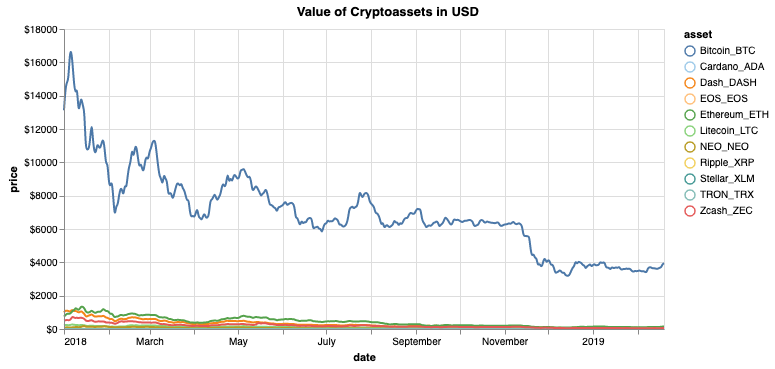

In [32]:
# dictionary of chart parameters
chart_params = {
    'df': multi_series_line_chart_data_all,
    'x': 'date',
    'y': 'price',
    'y_format_type': '$f',
    'y_scale_zero_bool': True,
    'chart_title': 'Value of Cryptoassets in USD',
    'color_scheme': 'tableau20',
    'width': 600,
    'height': 300
}
# generate chart
interactive_line_chart(chart_params)

##### 2.3 Simple Line Chart of Bitcoin Values from Market Data

In [33]:
# construct dataframe for visualization source data
bitcoin_market_data_price_close = multi_series_line_chart_data_all[multi_series_line_chart_data_all['asset'] == 'Bitcoin_BTC']

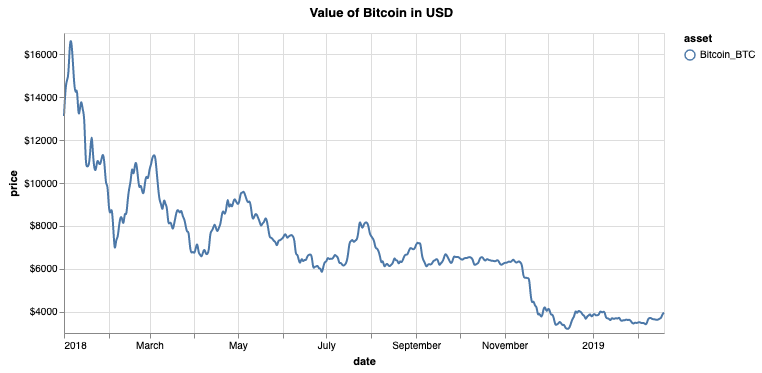

In [34]:
# dictionary of chart parameters
chart_params = {
    'df': bitcoin_market_data_price_close,
    'x': 'date',
    'y': 'price',
    'y_format_type': '$f',
    'y_scale_zero_bool': False,
    'chart_title': 'Value of Bitcoin in USD',
    'color_scheme': 'tableau20',
    'width': 600,
    'height': 300
}
# generate chart
interactive_line_chart(chart_params)

##### 2.4 Multi-Series Line Chart of Altcoin Values from Market Data

In [35]:
# construct dataframe for visualization source data
altcoin_market_data_price_close = multi_series_line_chart_data_all[multi_series_line_chart_data_all['asset'] != 'Bitcoin_BTC']

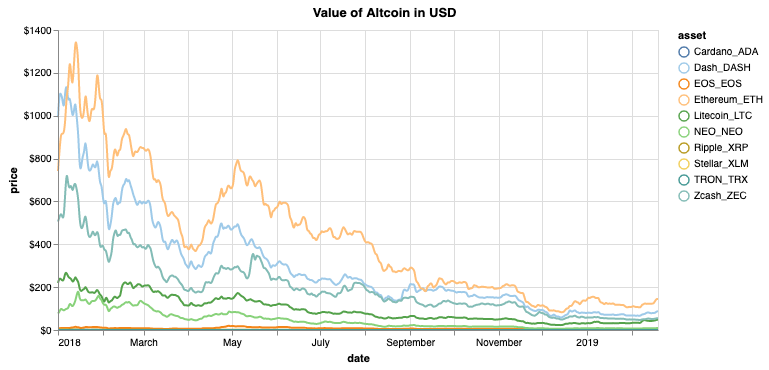

In [36]:
# dictionary of chart parameters
chart_params = {
    'df': altcoin_market_data_price_close,
    'x': 'date',
    'y': 'price',
    'y_format_type': '$f',
    'y_scale_zero_bool': False,
    'chart_title': 'Value of Altcoin in USD',
    'color_scheme': 'tableau20',
    'width': 600,
    'height': 300
}
# generate chart
interactive_line_chart(chart_params)

#### 3. Predictive Modeling

##### 3.1 Define Multiple Linear Regression

Definition of **Multiple Linear Regression** from Investopedia<sup>[3](#r3)</sup>:
<blockquote>"Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable."</blockquote>

##### 3.2 Formula for Multiple Linear Regression

The formula for Multiple Linear Regression<sup>[3](#r3)</sup>:

<div class="mlr_formula"></div>

#### 3.3 Construct Functions

**Construct Function for Determining Optimal Features per K value**

In [37]:
def select_kbest_reg(data_frame, target, k):
    """
    Selecting K-Best features regression
    
    data_frame: A pandas dataFrame with the training data
    target: target variable name in DataFrame
    k: desired number of features from the data
    feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return(feat_scores)

**Construct Function for Linear Regression**

In [38]:
def mlr(mlr_params):
    """
    Example argument dictionary:
    
    mlr_params = {
    'df': df,
    'date_series': df.date,
    'asset_series': df.asset,
    'target_series': df.target,
    'feature_selection': ['feature1', 'feature2', 'feature3', ...],
    'training_year': '2018',
    'test_year': '2019',
    'rmse_time_list': [1, 2, 5, 10, 25],
    'offset': 1 # train data on target number of days in future
    } 
    """
    rmse_df = pd.DataFrame(columns= ['asset', 'feature_count', 'rmse'] + ['rmse_' + str(s) for s in mlr_params['rmse_time_list']])
    feature_map_df = pd.DataFrame(columns=['feature_count', 'features'])
    test_series = []
    for asset in mlr_params['asset_series'].unique():
        regression_data = mlr_params['df'][mlr_params['asset_series'] == asset]
        regression_data = regression_data[mlr_params['feature_selection']]
        #splitting into train and test
        train = regression_data[regression_data.epoch_ts.astype('str').str.contains('2018', regex=False) == True]
        test = regression_data[regression_data.epoch_ts.astype('str').str.contains('2019', regex=False) == True]
        x_train = train[:-mlr_params['offset']].drop([mlr_params['date_series'].name, mlr_params['asset_series'].name, mlr_params['target_series'].name], axis=1).reset_index(drop=True)
        y_train = train[mlr_params['target_series'].name][mlr_params['offset']:].reset_index(drop=True)
        x_test = test[:-mlr_params['offset']].drop([mlr_params['date_series'].name, mlr_params['asset_series'].name, mlr_params['target_series'].name], axis=1).reset_index(drop=True)
        y_test = test[mlr_params['target_series'].name][mlr_params['offset']:].reset_index(drop=True)
        model = linear_model.LinearRegression()
        model.fit(x_train,y_train)
        # make predictions and find the rmse
        preds = model.predict(x_test)
        rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
        fc = len(x_train.columns)
        feature_map_dict = {
            'feature_count': fc,
            'features': list(x_train.columns)
        }
        rmse_dict = {
            'asset': asset,
            'feature_count': fc,
            'rmse': rmse,
        }
        for period in mlr_params['rmse_time_list']:
            rmse_dict['rmse_' + str(period)] = np.sqrt(np.mean(np.power((np.array(y_test[0:period])-np.array(preds[0:period])),2)))
        rmse_df = rmse_df.append(rmse_dict, ignore_index=True)
        feature_map_df = feature_map_df.append(feature_map_dict, ignore_index=True)
        test = test[:-mlr_params['offset']]
        test['prediction'] = preds
        test_series.append(test.reset_index(drop=True))
    test_series.append(rmse_df)
    test_series.append(feature_map_df)
    return(test_series)

**Construct Function for Finding the Optimal Features**  
Based on model with lowest RMSE

In [39]:
def k_lr_loop(dataframe, drop_columns_list):
    rmse_log = pd.DataFrame()
    feature_log = pd.DataFrame()
    best_k_log = []
    k = len(dataframe.drop(columns=drop_columns_list).columns) - 1
    for k in range(1,k+1):
        kbest_lr = select_kbest_reg(dataframe.drop(columns=drop_columns_list), 'price_close', k=k)
        kbest_lr_features = list(kbest_lr.Attribute[kbest_lr.Support == True]) + list(['epoch_ts', 'base_asset_id', 'price_close'])
        mlr_params = {
            'df': dataframe,
            'date_series': dataframe.epoch_ts,
            'asset_series': dataframe.base_asset_id,
            'target_series': dataframe.price_close,
            'feature_selection': kbest_lr_features,
            'training_year': '2018',
            'test_year': '2019',
            'rmse_time_list': [1, 2, 5, 10, 25],
            'offset': 1
        }
        lr = mlr(mlr_params)
        rmse_log = rmse_log.append(pd.DataFrame(data=lr[-2]), ignore_index=True)
        feature_log = feature_log.append(pd.DataFrame(data=lr[-1])[:1], ignore_index=True)
    for i, asset in enumerate(rmse_log.asset.unique()):
        best_k_match = (str(asset), int(rmse_log.feature_count[rmse_log.rmse == rmse_log.rmse[rmse_log.asset == asset].min()]))
        best_k_log += [best_k_match]
    return(rmse_log, feature_log, best_k_log)

#### 3.4 Experiment

In [40]:
# find optimal multiple regression model for each cryptoasset
# record the RMSE values for each model and timeframe
# generate log of utilized features by k value
rmse_log, feature_log, best_k_log = k_lr_loop(normalized_merge_data,['epoch_ts', 'base_asset_id'])
feature_log = feature_log.set_index('feature_count', drop=True)

In [41]:
rmse_log.head()

,asset,feature_count,rmse,rmse_1,rmse_2,rmse_5,rmse_10,rmse_25
0,Bitcoin_BTC,1,0.019005,0.009449,0.006780,0.006103,0.009750,0.007480
1,Dash_DASH,1,0.142317,0.101548,0.104140,0.106608,0.111185,0.119835
2,Ethereum_ETH,1,0.144180,0.106609,0.113289,0.119034,0.122114,0.124285
3,Litecoin_LTC,1,0.178723,0.105001,0.107369,0.113887,0.130042,0.137984
4,Zcash_ZEC,1,0.104042,0.068751,0.071080,0.073024,0.077448,0.085959


In [42]:
feature_log.head()

,features
feature_count,
1,[days_passed]
2,"[dayofmonth, days_passed]"
3,"[dayofmonth, dayofweek, days_passed]"
4,"[blockchain_size, dayofmonth, dayofweek, days_..."
5,"[supply_total, blockchain_size, dayofmonth, da..."


In [43]:
test_df = pd.DataFrame()
for asset in best_k_log:
    feature_selection = feature_log.loc[asset[1], 'features'] + list(['epoch_ts', 'base_asset_id', 'price_close'])
    df = normalized_merge_data[normalized_merge_data.base_asset_id == asset[0]]
    mlr_params = {
    'df': df,
    'date_series': df.epoch_ts,
    'asset_series': df.base_asset_id[df.base_asset_id == asset[0]],
    'target_series': df.price_close,
    'feature_selection': feature_selection, 
    'training_year': '2018',
    'test_year': '2019',
    'rmse_time_list': [1, 2, 5, 10, 25],
    'offset': 1
    }
    test_df = test_df.append(mlr(mlr_params)[:1], sort=True)

## Results

### 1. Import Packages/Libraries

In [44]:
# import packages/libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 2. Visualization of Predictions and Actual Values

#### 2.1 Construct Dataframe of Prediction Values

In [45]:
# construct dataframe
prediction_df = test_df[['base_asset_id', 'epoch_ts', 'prediction']].sort_values(['epoch_ts','base_asset_id']).reset_index(drop=True)
prediction_df.columns = ['base_asset_id', 'epoch_ts', 'price_close']
prediction_df['type'] = 'prediction'

#### 2.2 Preview Prediction Values

In [46]:
prediction_df.head()

,base_asset_id,epoch_ts,price_close,type
0,Bitcoin_BTC,2019-01-01,0.040198,prediction
1,Dash_DASH,2019-01-01,0.018183,prediction
2,Ethereum_ETH,2019-01-01,0.031914,prediction
3,Litecoin_LTC,2019-01-01,0.027667,prediction
4,Zcash_ZEC,2019-01-01,0.012920,prediction


#### 2.3 Construct Dataframe of Test Values

Constructing a new dataframe of the test dataset from the normalized_merge_data dataframe because the actual regression testing was done with offset data, so comparison is best done with data not used directly by the model as it has been manipulated.

In [47]:
# construct dataframe
test_df = normalized_merge_data[['base_asset_id', 'epoch_ts', 'price_close']][normalized_merge_data.epoch_ts.astype('str').str.contains('2019', regex=False) == True].sort_values(['epoch_ts','base_asset_id']).reset_index(drop=True)
test_df['type'] = 'test'

#### 2.4 Preview Test Values

In [48]:
test_df.head()

,base_asset_id,epoch_ts,price_close,type
0,Bitcoin_BTC,2019-01-01,0.040848,test
1,Dash_DASH,2019-01-01,0.019562,test
2,Ethereum_ETH,2019-01-01,0.039125,test
3,Litecoin_LTC,2019-01-01,0.033235,test
4,Zcash_ZEC,2019-01-01,0.013407,test


#### 2.5 Construct DataFrame of Training Values  
Constructing a new dataframe of the training dataset from the normalized_merge_data dataframe because the actual regression training was done with offset data, so comparison is best done with data not used directly by the model as it has been manipulated.

In [49]:
train_df = normalized_merge_data[['base_asset_id', 'epoch_ts', 'price_close']][normalized_merge_data.epoch_ts.astype('str').str.contains('2018', regex=False) == True].sort_values(['epoch_ts','base_asset_id']).reset_index(drop=True)
train_df['type'] = 'train'

#### 2.6 Preview Training Values

In [50]:
train_df.head()

,base_asset_id,epoch_ts,price_close,type
0,Bitcoin_BTC,2018-01-01,0.763983,train
1,Dash_DASH,2018-01-01,0.834357,train
2,Ethereum_ETH,2018-01-01,0.501774,train
3,Litecoin_LTC,2018-01-01,0.798026,train
4,Zcash_ZEC,2018-01-01,0.617202,train


#### 2.7 Construct Aggregated Time-Series DataFrame of Testing, Training, and Prediction Values

In [51]:
# construct dataframe
lr_visualization_data = pd.DataFrame(columns=train_df.columns)
lr_visualization_data = lr_visualization_data.append(train_df)
lr_visualization_data = lr_visualization_data.append(prediction_df)
lr_visualization_data = lr_visualization_data.append(test_df)

In [52]:
# transform data for multi-series line chart
lr_visualization_data_ms = lr_visualization_data
lr_visualization_data_ms['asset'] = lr_visualization_data_ms['base_asset_id'].map(str) + '_' + lr_visualization_data_ms['type']
lr_visualization_data_ms = lr_visualization_data_ms.drop(columns=['type', 'base_asset_id'])

#### 2.8 Preview Aggregated DataFrame

In [53]:
lr_visualization_data_ms.head()

,epoch_ts,price_close,asset
0,2018-01-01,0.763983,Bitcoin_BTC_train
1,2018-01-01,0.834357,Dash_DASH_train
2,2018-01-01,0.501774,Ethereum_ETH_train
3,2018-01-01,0.798026,Litecoin_LTC_train
4,2018-01-01,0.617202,Zcash_ZEC_train


#### 2.9 Generate and Display Visualization of Price Values
**Actual Values**(postfix): _test, _train  
**Predicted Values**(postfix): _prediction  

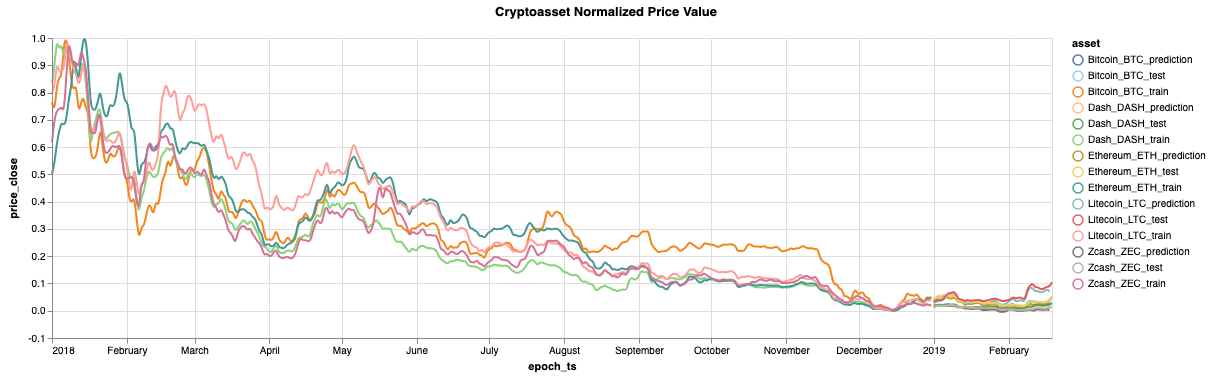

In [54]:
# dictionary of chart parameters
chart_params = {
    'df': lr_visualization_data_ms,
    'x': 'epoch_ts',
    'y': 'price_close',
    'y_format_type': '',
    'y_scale_zero_bool': False,
    'chart_title': 'Cryptoasset Normalized Price Value',
    'color_scheme': 'tableau20',
    'width': 1000,
    'height': 300
}
# generate chart
interactive_line_chart(chart_params)

#### 2.10  Generate and Display Visualization of Isolated Actual Values vs Predicted Values

In [55]:
# generate dataframe of test and prediction
lr_visualization_data_ms_test_predict = lr_visualization_data_ms[lr_visualization_data_ms.asset.astype('str').str.contains('test|prediction', regex=True) == True].sort_values(['epoch_ts','asset']).reset_index(drop=True)

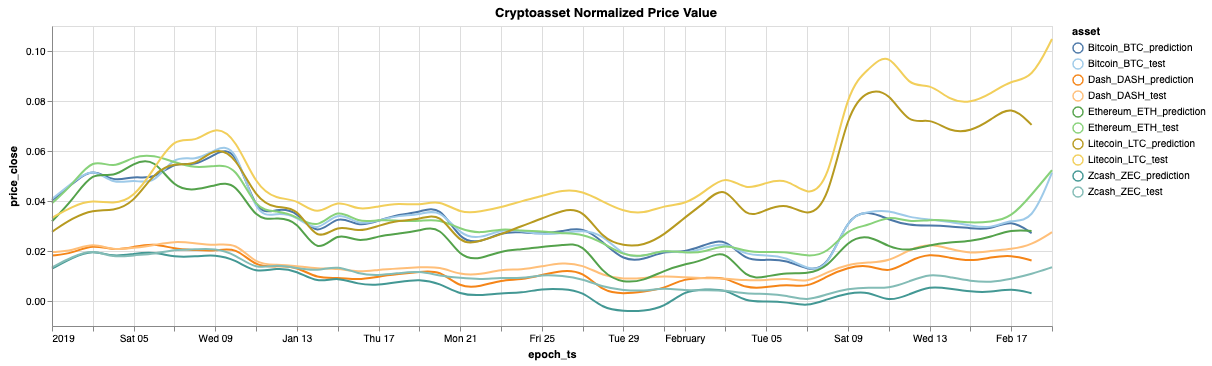

In [56]:
# dictionary of chart parameters
chart_params = {
    'df': lr_visualization_data_ms_test_predict,
    'x': 'epoch_ts',
    'y': 'price_close',
    'y_format_type': '',
    'y_scale_zero_bool': False,
    'chart_title': 'Cryptoasset Normalized Price Value',
    'color_scheme': 'tableau20',
    'width': 1000,
    'height': 300
}
# generate chart
interactive_line_chart(chart_params)

### 3. Root Mean Square Error(Normalized price_close)

In [57]:
# construct dataframe of rmse of implimented model
rmse_best_k = pd.DataFrame(columns=['asset', 'RMSE', 'feature_count'])
for asset in best_k_log:
    rmse = rmse_log.rmse[rmse_log.asset == asset[0]][rmse_log.feature_count == asset[1]].iloc[0]
    feature_count = rmse_log.feature_count[rmse_log.asset == asset[0]][rmse_log.feature_count == asset[1]].iloc[0]
    rmse_best_k_dict = {
        'asset': asset[0],
        'RMSE': rmse,
        'feature_count': feature_count
    }
    rmse_best_k = rmse_best_k.append(rmse_best_k_dict, ignore_index=True)

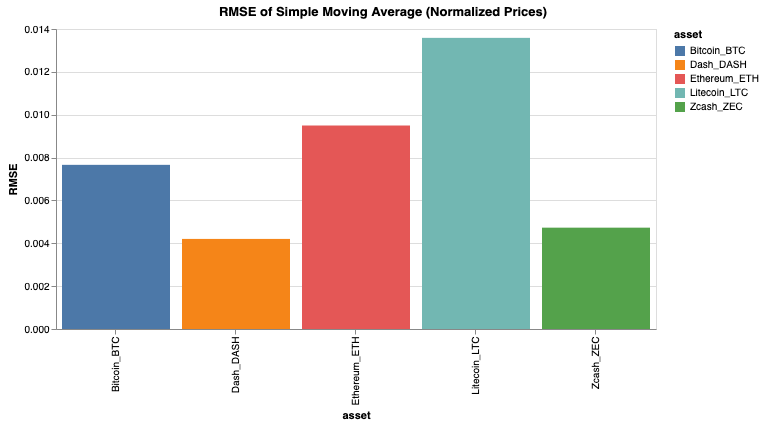

Number of Features for Best Multiple Regression Model and Corresponding RMSE Value


,asset,RMSE,feature_count
0,Bitcoin_BTC,0.007660,5
1,Dash_DASH,0.004204,9
2,Ethereum_ETH,0.009496,36
3,Litecoin_LTC,0.013586,35
4,Zcash_ZEC,0.004729,5


In [58]:
# generate rmse chart
lr_closing_price_rmse_normalized_chart = alt.Chart(rmse_best_k).mark_bar().encode(
    x='asset',
    y='RMSE',
    color='asset',
).properties(title='RMSE of Simple Moving Average (Normalized Prices)', width=600)
# return chart and dataframe
lr_closing_price_rmse_normalized_chart
print("Number of Features for Best Multiple Regression Model and Corresponding RMSE Value")
rmse_best_k

## Conclusion
The results of the experiment implimenting a multiple regression model were fairly accurate. The models would need to be continually retrained over time for the accuracy to hold up. The information is not something to rely on but rather could be useful for understanding the current trends in terms of cryptoasset value.

## References

<ol class="references">
    <li id="r1">Farell, R. (2015, May). An Analysis of the Cryptocurrency Industry. Retrieved March 20, 2019, from http://repository.upenn.edu/wharton_research_scholars/130</li>
    <li id="r3">Kenton, W. (2019, February 28). Multiple Linear Regression – MLR Definition. Retrieved March 25, 2019, from https://www.investopedia.com/terms/m/mlr.asp</li>
    <li id="r4">Long short-term memory. (2019, March 11). Retrieved March 27, 2019, from https://en.wikipedia.org/wiki/Long_short-term_memory</li>
</ol>